# Law of Large Numbers

<a href="#Which-One-is-Weak-Law-of-Large-Numbers?">Which One is Law of Large Numbers?</a>

<a href="#Monte-Carlo-Estimation-of-PI">Monte Carlo Estimation of PI</a>
 
<a href="#Buffon's-Needle">Buffon's Needle</a>

# Which One is Law of Large Numbers?

We flip a fair coin and record 1 if head, 0 otherwise.
In the top we flip a fair coin many times and record the sample mean as a function of the number of flips. In the bottom we flip a fair coin 1000 times and record the sample mean. We do this 10000 times and draw the histogram of the sample mean of the 1000 flips.
Which one is the weak law and which one is the strong law?

<div align="center"><img src="img/Screen Shot 2019-01-13 at 8.44.48 PM.png" width="40%"></div>

<div align="center"><img src="img/Screen Shot 2019-01-13 at 8.45.03 PM.png" width="40%"></div>

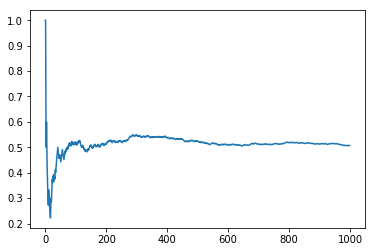

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# B(n,p)
n = 1
p = 0.5

n_simulations = 1000

a = np.random.binomial(n, p, (n_simulations,))
cum_average = np.cumsum(a)/(np.arange(n_simulations)+1)

plt.plot(cum_average)
plt.show()

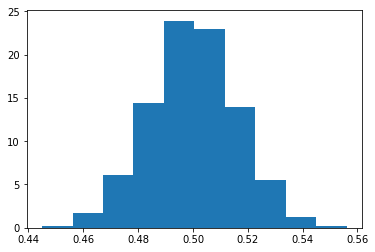

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# B(n,p)
n = 1
p = 0.5

n_samples = 10000
n_coin_flips_for_each_sample = 1000

a = np.random.binomial(n, p, (n_samples, n_coin_flips_for_each_sample))
samples = np.sum(a,1) / n_coin_flips_for_each_sample

plt.hist(samples, bins=10, density=True)
plt.show()

# Monte Carlo Estimation of PI

- Draw $n$ random points $X_i$ from $[0,1]^2$

- Record $R_i$ whether the point is inside of the unit circle.
$$
R_i=\left\{\begin{array}{ll}
1&\mbox{if $X_i$ is inside of the unit circle}\\
0&\mbox{otherwise}
\end{array}\right.
$$

$$
\frac{\pi}{4}\quad=\quad\mathbb{E}R\quad\approx\quad\frac{1}{n}\sum_{i=1}^nR_i
$$
or
$$
\pi\quad\approx\quad\frac{4}{n}\sum_{i=1}^nR_i
$$

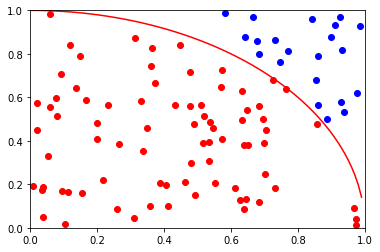

Number of generated points:  100
Estimation of pi:            3.16


In [21]:
import numpy as np
import matplotlib.pyplot as plt

N_POINTS = 100

# Random points in unit square 
x = np.random.uniform(0, 1, (2, N_POINTS))
r_square = np.sum(x**2, axis=0)

# Random points in unit square - red if points are inside unit circle, unit circle added
plt.axis([0,1,0,1]) # [xmin, xmax, ymin, ymax]
boundary_x = np.arange(0, 1, 0.01)
boundary_y = np.sqrt(1 - boundary_x**2)
plt.plot(boundary_x, boundary_y, 'r')
for i in range(N_POINTS):
    if x[0,i]**2 + x[1,i]**2 <1:
        plt.plot(x[0,i], x[1,i], 'ro')
    else:
        plt.plot(x[0, i], x[1, i], 'bo')
plt.show()

print("Number of generated points: ", N_POINTS)
print("Estimation of pi:           ", (4/N_POINTS) * np.sum(r_square < 1))

In [22]:
# - Tomáš Bouda
# [Day 9: Monte carlo - π](https://medium.com/100-days-of-algorithms/day-9-monte-carlo-%CF%80-7ae010743bde)
# [github](https://github.com/coells/100days)

import numpy as np

def pi(n, batch=1000):
    t = 0
    for i in range(n // batch):
        p = np.random.uniform(0, 1, (batch, 2))
        p = (p * p).sum(axis=1)
        t += (p <= 1).sum()
    return 4 * t / n

print(pi(10 ** 3))
print(pi(10 ** 4))
print(pi(10 ** 5))
print(pi(10 ** 6))
print(pi(10 ** 7))
print(pi(10 ** 8))

3.14
3.1268
3.14176
3.1413
3.1417028
3.14129204


[<a href="#Law-of-Large-Numbers">Back to top</a>]

# Buffon's Needle

- On a paper we draw parallel lines 1 units apart.

- We drop a needle of length 1 onto the paper $n$ times and record $R_i$ whether the needle intersect the line.
$$
R_i=\left\{\begin{array}{ll}
1&\mbox{if the needle intersect the line at the $i$-th drop}\\
0&\mbox{otherwise}
\end{array}\right.
$$

$$
\frac{2}{\pi}\quad=\quad\mathbb{E}R\quad\approx\quad\frac{1}{n}\sum_{i=1}^nR_i
$$
or
$$
\pi\quad\approx\quad\frac{2n}{\sum_{i=1}^nR_i}
$$

<div align="center"><img src="http://www.clayford.net/statistics/wp-content/uploads/2013/02/buf_02.png" width="80%"></div>

http://www.clayford.net/statistics/wp-content/uploads/2013/02/buf_02.png

Number of Needles             :  1000
Monte Carlo Estimate of $\pi$ :  3.0721966205837172


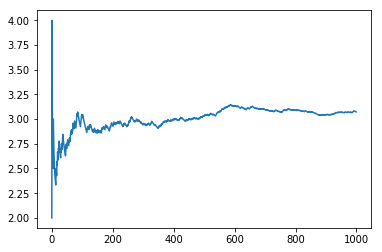

In [23]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(423126515)

n = 1000                           # Number of random samples generated
x = np.random.uniform(0, 1, (n,2)) # 0th column = height of lower end, 1st column = angle/pi 
h = x[:,0] + np.sin(np.pi*x[:,1])  # Height of higher end
N = np.sum(h>=1)                   # Number of random samples hit the upper bar at y=1
Estimated_pi = 2*n/N               # Estimated pi

print("Number of Needles             : ", n)
print("Monte Carlo Estimate of $\pi$ : ", Estimated_pi)

# plot of Monte Carlo Estimate of $\pi$ 
# as a function of Number of Buffon's Needles 
N_cum = np.cumsum(h>=1) 
Estimated_pi_cum = 2*(np.arange(0,n)+1)/(N_cum+0.00000001) 
plt.plot(Estimated_pi_cum)
plt.show()

[<a href="#Law-of-Large-Numbers">Back to top</a>]